In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')
%matplotlib inline

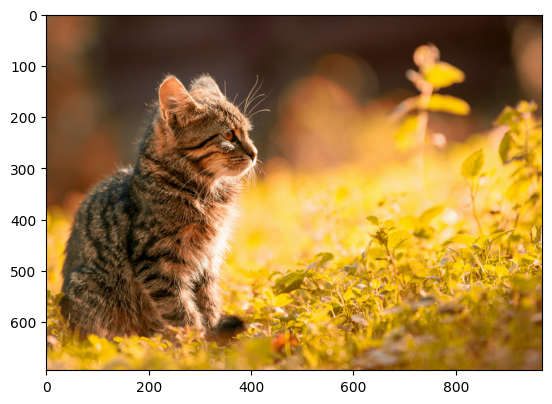

In [ ]:
original_img = plt.imread('/work/Cat.png')
plt.imshow(original_img)
if original_img.shape[2] == 4:  # Checking if the image has 4 channels
    original_img = original_img[:, :, :3]  # Keeping only the first three channels

In [ ]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
K = 16
max_iters = 100

In [ ]:
kmeans = KMeans(n_clusters=K, max_iter=max_iters)
kmeans.fit(X_img)
centroids = kmeans.cluster_centers_
idx = kmeans.labels_

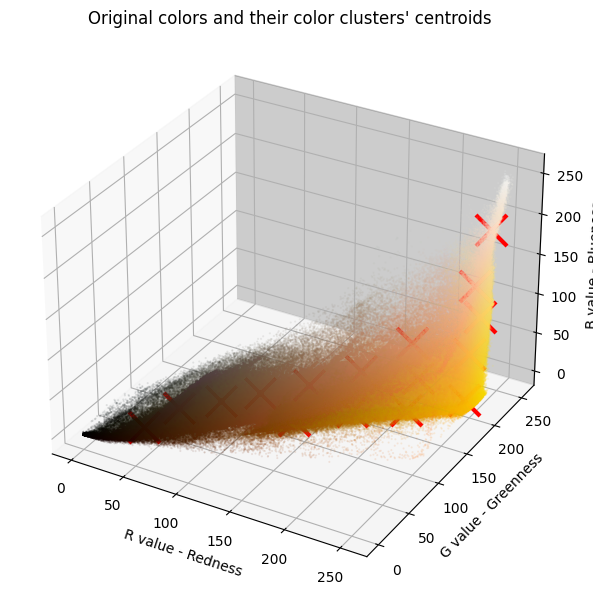

In [ ]:
def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    
    # First plot the color points with a lower zorder
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X, alpha=0.1, zorder=1)
    
    # Then plot the centroids with a higher zorder to ensure they appear on top
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3, zorder=2)
    
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()

plot_kMeans_RGB(X_img, centroids, idx, K)

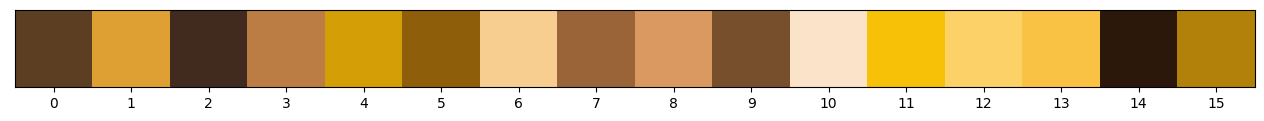

In [ ]:
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

show_centroid_colors(centroids)

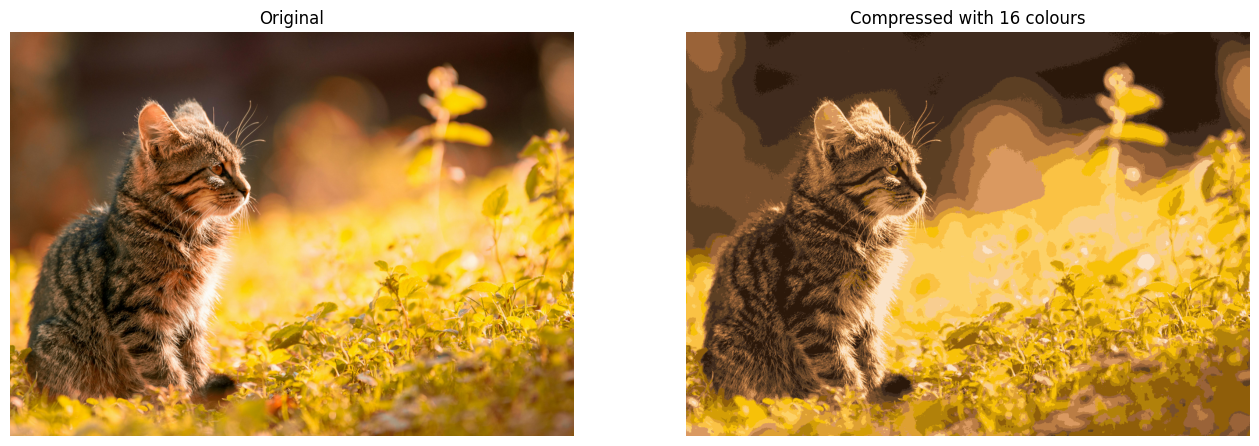

In [ ]:
# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 
# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 


# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e8eb00db-bf4e-4407-a5e3-93e25b28ccfe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>